## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
dataset = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [3]:
dataset

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
dataset.isnull

<bound method DataFrame.isnull of              Genre  Age  Annual_Income_(k$)  Spending_Score
CustomerID                                                 
1             Male   19                  15              39
2             Male   21                  15              81
3           Female   20                  16               6
4           Female   23                  16              77
5           Female   31                  17              40
...            ...  ...                 ...             ...
196         Female   35                 120              79
197         Female   45                 126              28
198           Male   32                 126              74
199           Male   32                 137              18
200           Male   30                 137              83

[200 rows x 4 columns]>

In [8]:
pd.get_dummies(data=dataset,columns=['Genre'],drop_first='True')

,Age,Annual_Income_(k$),Spending_Score,Genre_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


## EDA

<Axes: xlabel='Age', ylabel='count'>

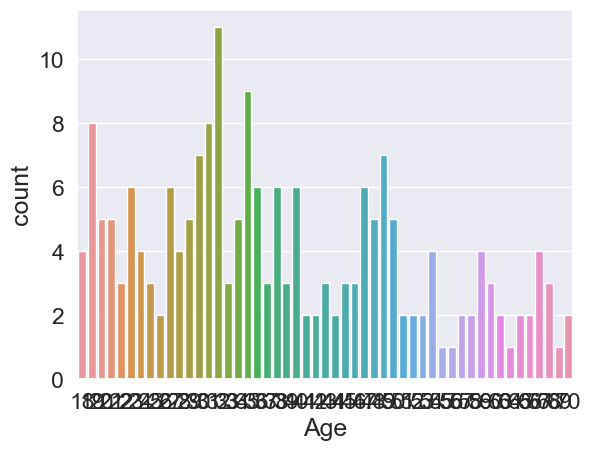

In [9]:
sns.countplot(data=dataset,x='Age')

<Axes: xlabel='Annual_Income_(k$)', ylabel='count'>

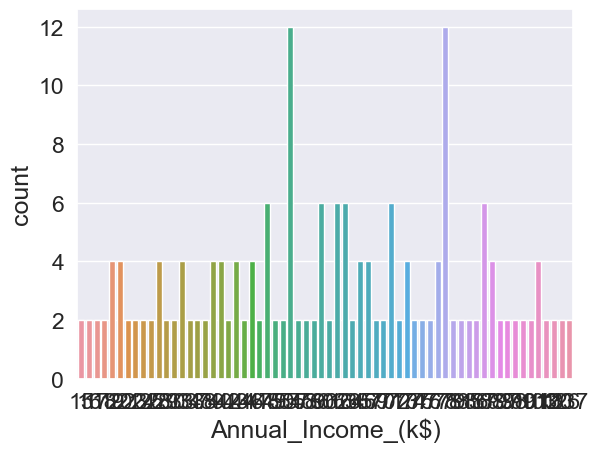

In [10]:
sns.countplot(data=dataset,x='Annual_Income_(k$)')

<Axes: xlabel='Spending_Score', ylabel='count'>

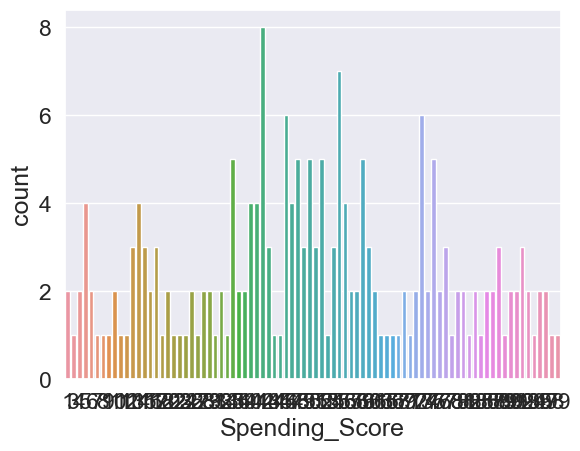

In [11]:
sns.countplot(data=dataset,x='Spending_Score')

C:\Users\admin\AppData\Local\Temp\ipykernel_4648\1914151216.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


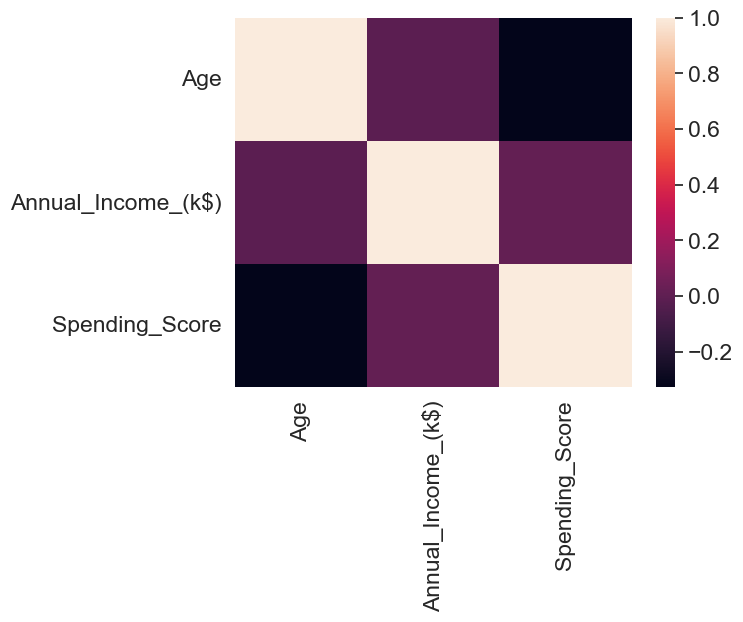

In [12]:
sns.heatmap(dataset.corr())
plt.show()

<Axes: >

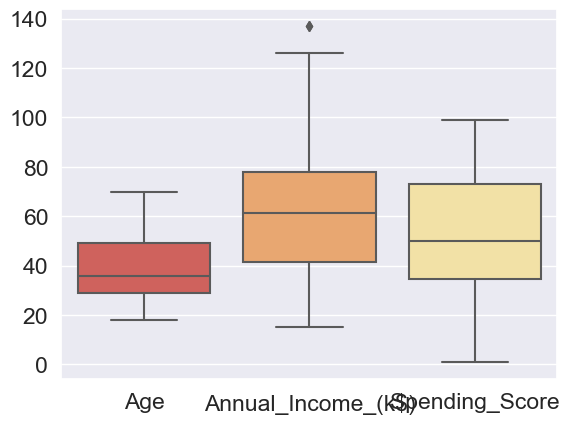

In [13]:
sns.boxplot(data=dataset)

In [14]:
dataset.drop_duplicates(inplace=True)

In [15]:
X=dataset.iloc[:,[2,3]].values

In [16]:
dataset[['Annual_Income_(k$)','Spending_Score']].values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

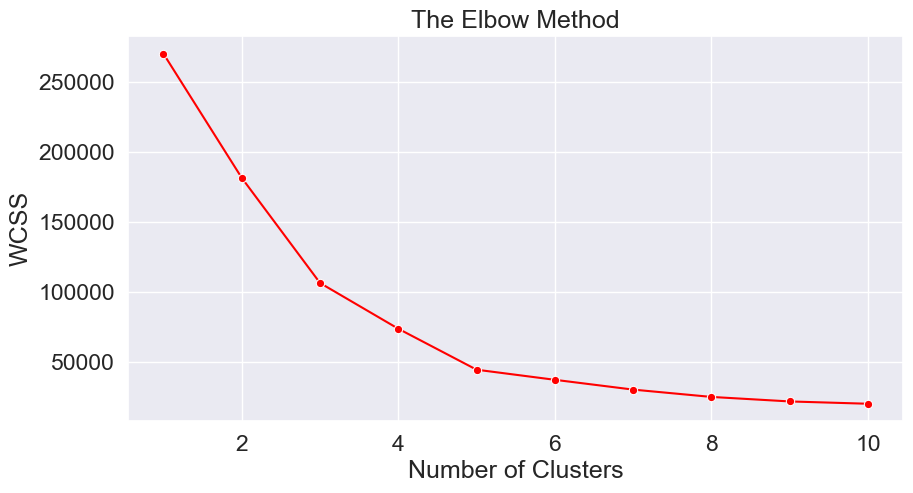

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Fitting K-Means to the dataset

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

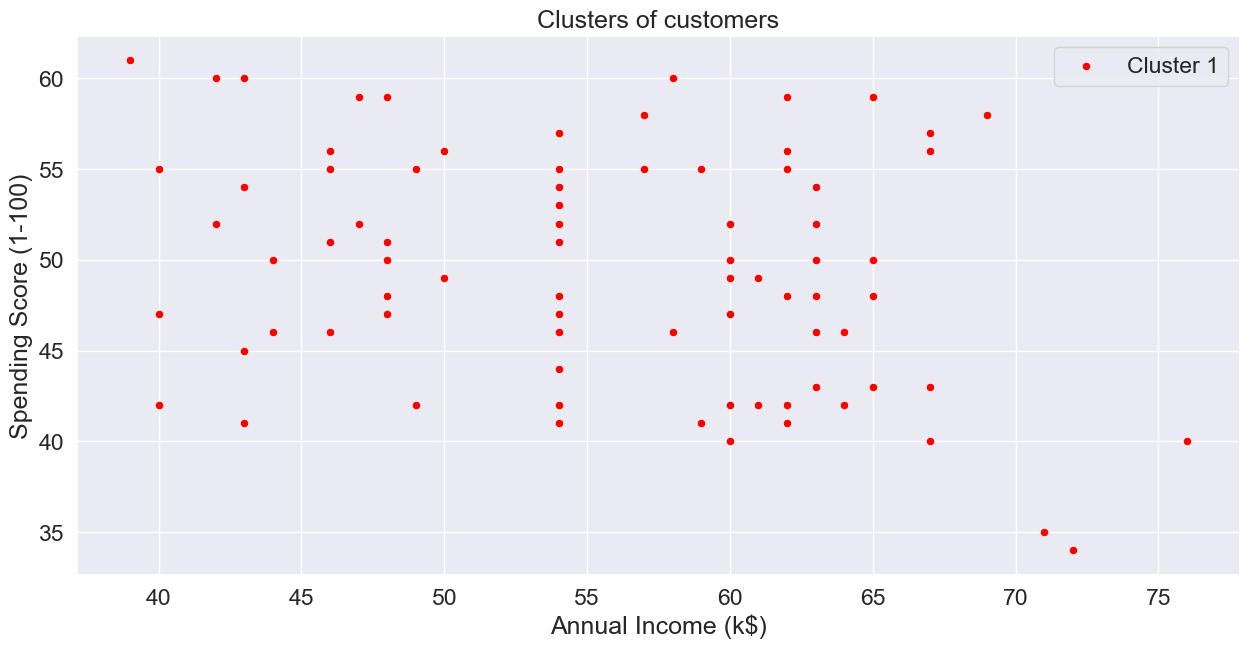

In [20]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

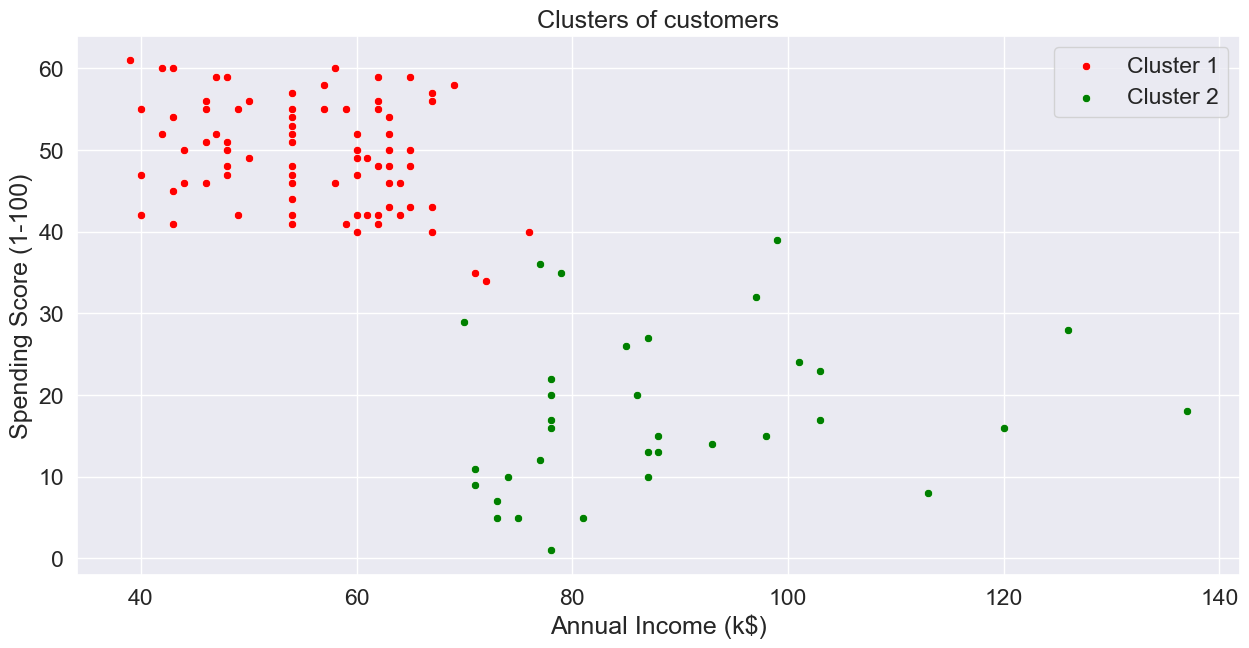

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'green', label = 'Cluster 2')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

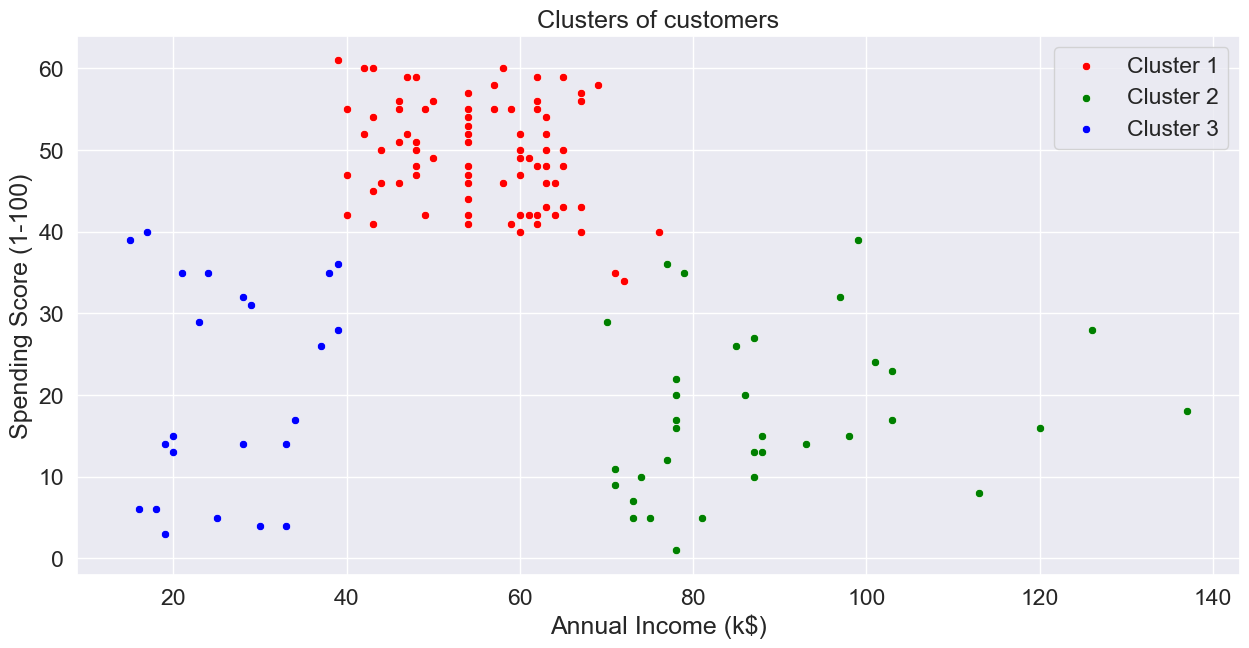

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'green', label = 'Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'blue', label = 'Cluster 3')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

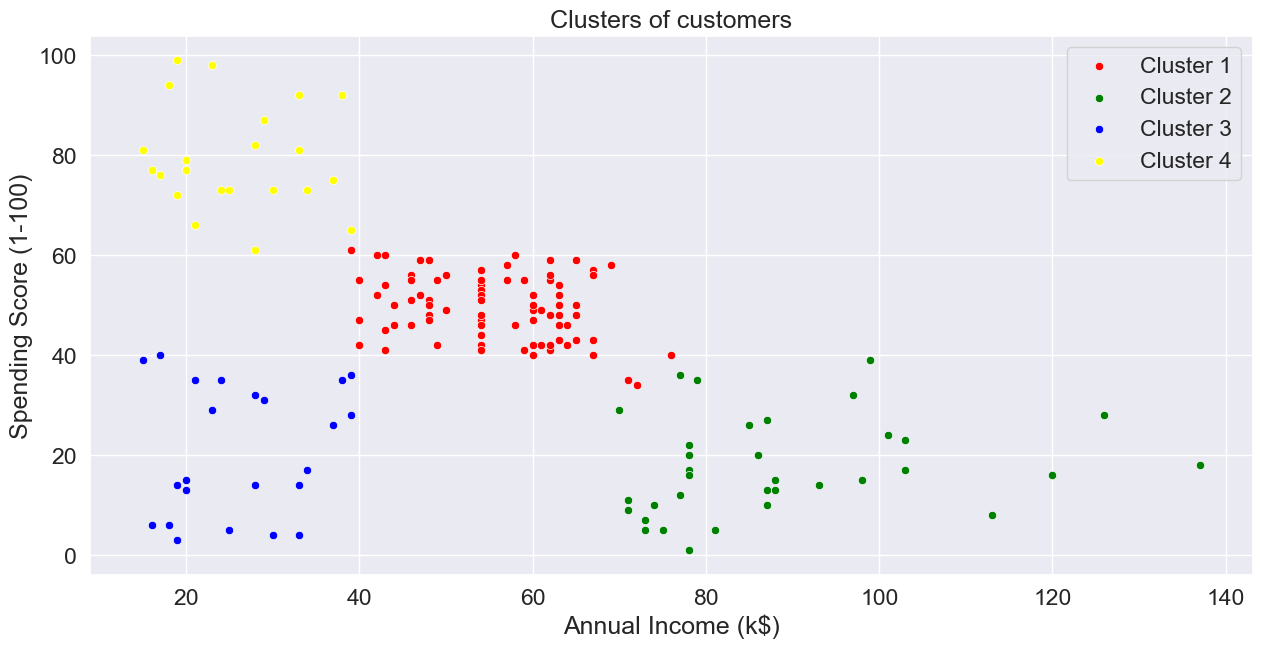

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'green', label = 'Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'blue', label = 'Cluster 3')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'yellow', label = 'Cluster 4')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

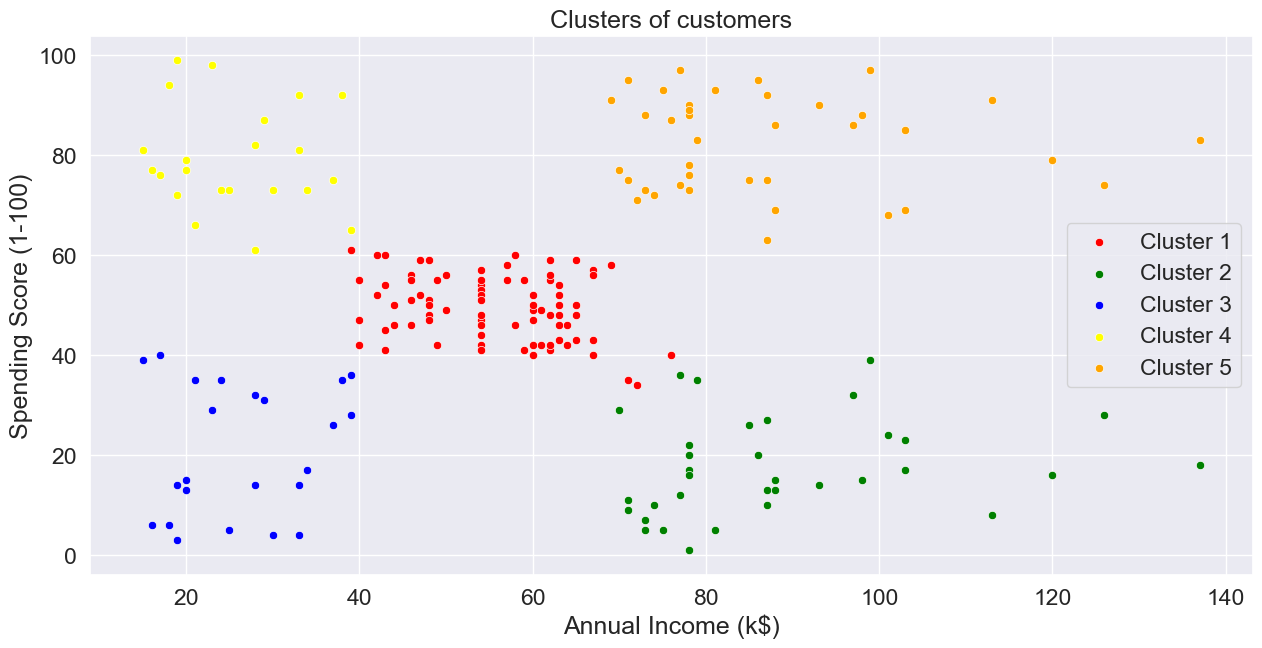

In [24]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'green', label = 'Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'blue', label = 'Cluster 3')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'yellow', label = 'Cluster 4')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

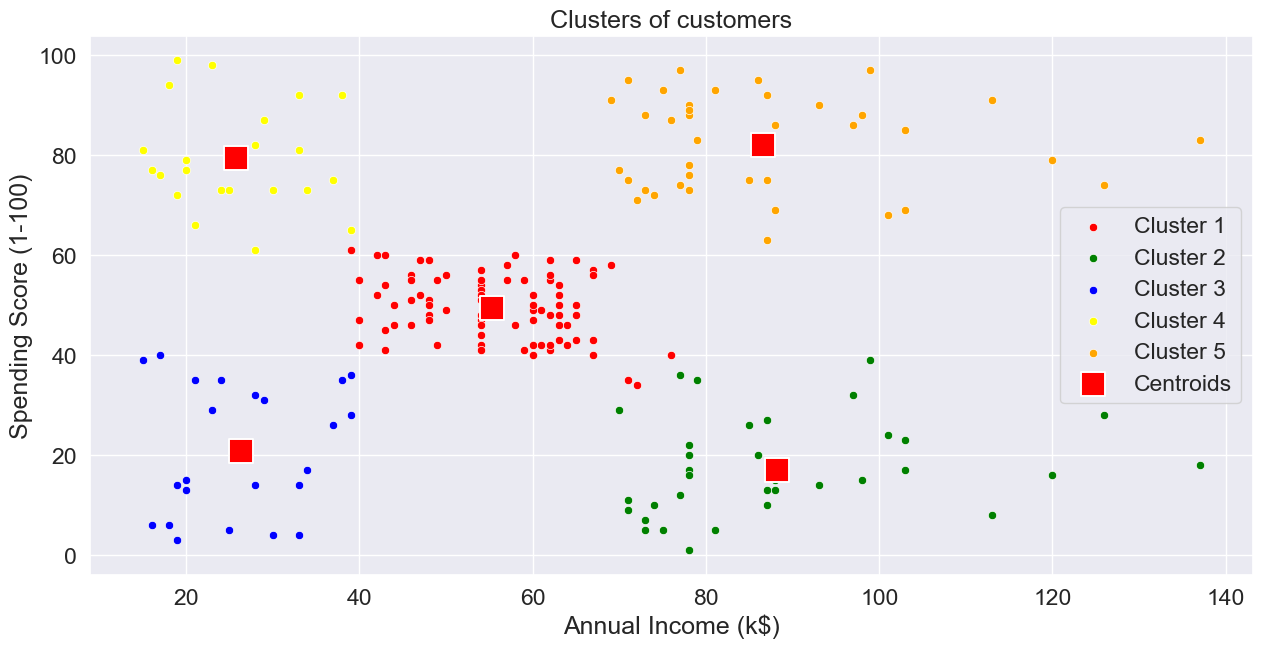

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'green', label = 'Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'blue', label = 'Cluster 3')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'yellow', label = 'Cluster 4')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()